<h3>Exploratory Data Analysis NYC-trip duration dataset</h3>

In [7]:
# importing libraries
import pandas as pd
import numpy as np
import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#plt.rcParams['figure.figsize']=(10,10)
sns.set()
sns.set(style="darkgrid")
import statsmodels.api as sm 
import pylab as py
# to calculate distance
from geopy import distance

In [8]:
#importing data
data = pd.read_csv("nyc_taxi_trip_duration.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [9]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [10]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(729322, 11)

In [11]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

<h4>Variable Identification and Typecasting</h4>

In [12]:
# A closer look at the data types present in the data
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

There are a lot of variables visible at one, so let's narrow this down by looking at<b> one datatype </b> at once. We will start with int

<h4><u>Integer Data Type</u></h4>

In [13]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

<ol>
<li><b>vendor_id</b> - a code indicating the provider associated with the trip record. It represents different vendor, therefore it should be <b>convereted to category</b>.
<li><b>passenger_count</b> - the number of passengers in the vehicle (driver entered value). Ok to remain int.
<li><b>trip_duration</b> - (target) duration of the trip in seconds. Ok to reamin int.
</ol>

In [14]:
# typecasting "vendor_id" to category type
data['vendor_id'] = data['vendor_id'].astype('category')
# checking
data[['vendor_id']].dtypes

vendor_id    category
dtype: object

<h4><u>Float Data Type</u></h4>

In [15]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

<ol>
<li><b>pickup_longitude</b> - the longitude where the meter was engaged
<li><b>pickup_latitude</b> - the latitude where the meter was engaged
<li><b>dropoff_longitude</b> - the longitude where the meter was disengaged
<li><b>dropoff_latitude</b> - the latitude where the meter was disengaged
</ol>

<h4><u>Object Data Type</u></h4>

In [16]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

<ol>
<li><b>id</b> - a unique identifier for each trip. For ex: id1080784. id is a <b> string object so it is ok to keep it that way</b>.
<li><b>pickup_datetime</b> - date and time when the meter was engaged.<b> Object type needs to be changed to datetime dtype.</b>
<li><b>dropoff_datetime</b> - date and time when the meter was disengaged.<b> Object type needs to be changed to datetime dtype.</b>
<li><b>store_and_fwd_flag</b> - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip). It is string object right now. It should be <b>converted to categorical object</b>.
</ol>

In [17]:
# typecasting "store_and_fwd_flag" to category type
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
#data['pickup_datetime'] = data['pickup_datetime'].astype('datetime')
# checking
data[['store_and_fwd_flag']].dtypes

store_and_fwd_flag    category
dtype: object

In [18]:
# Changing the dtype of "pickup_datetime" and "dropoff_datetime" to datetime 
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime']= pd.to_datetime(data.dropoff_datetime)

In [19]:
data['pickup_datetime'].min(), data['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

<p>This dataset has datetime of first 6 months of 2016.</p>

In [20]:
# extracting new columns from "pickup_datetime"
# creating an instance(date) of DatetimeIndex class using "pickup_datetime"
date = pd.DatetimeIndex(data['pickup_datetime'])
# day of year when pickup_datetime was done
data['doy_pickup'] = date.dayofyear

# week of year when pickup_datetime was done
data['woy_pickup'] = date.weekofyear

# month of year when pickup_datetime was done
data['moy_pickup'] = date.month

# day of week when pickup_datetime was done
data['dow_pickup'] = date.dayofweek
#######################################################################
# extracting new columns from "dropoff_datetime"
# creating an instance(date) of DatetimeIndex class using "pickup_datetime"
date = pd.DatetimeIndex(data['dropoff_datetime'])
# day of year when dropoff_datetime was done
data['doy_dropoff'] = date.dayofyear

# week of year when dropoff_datetime was done
data['woy_dropoff'] = date.weekofyear

# month of year when dropoff_datetime was done
data['moy_dropoff'] = date.month

# day of week when dropoff_datetime was done
data['dow_dropoff'] = date.dayofweek

data['hour']=data['pickup_datetime'].dt.hour

In [21]:
data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_pickup,woy_pickup,moy_pickup,dow_pickup,doy_dropoff,woy_dropoff,moy_dropoff,dow_dropoff,hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,9,2,0,60,9,2,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,10,3,4,71,10,3,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,7,2,6,52,7,2,6,17
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,1,5,1,1,1,9
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,7,2,2,48,7,2,2,6


In [22]:
# checking new extracted columns using datetime
data[['pickup_datetime','doy_pickup','woy_pickup','moy_pickup','dow_pickup','dropoff_datetime','doy_dropoff','woy_dropoff','moy_dropoff','dow_dropoff']].head()

,pickup_datetime,doy_pickup,woy_pickup,moy_pickup,dow_pickup,dropoff_datetime,doy_dropoff,woy_dropoff,moy_dropoff,dow_dropoff
0,2016-02-29 16:40:21,60,9,2,0,2016-02-29 16:47:01,60,9,2,0
1,2016-03-11 23:35:37,71,10,3,4,2016-03-11 23:53:57,71,10,3,4
2,2016-02-21 17:59:33,52,7,2,6,2016-02-21 18:26:48,52,7,2,6
3,2016-01-05 09:44:31,5,1,1,1,2016-01-05 10:03:32,5,1,1,1
4,2016-02-17 06:42:23,48,7,2,2,2016-02-17 06:56:31,48,7,2,2


In [23]:
# calculating distance
# Number of rows in dataframe
num_rows=data.shape[0]
geo_distance=[]
x1,y1=(data['pickup_longitude'],data['pickup_latitude'])
x2,y2=(data['dropoff_longitude'],data['dropoff_longitude'])
out_of_bound_coordinates_pair={}
for i in range(0,num_rows):
    try:
        d=distance.distance((x1[i],y1[i]), (x2[i],y2[i])).km
    except ValueError:
        d=None
        out_of_bound_coordinates_pair[data["id"][i]]=[(x1[i],y1[i]),(x2[i],y2[i])]
    geo_distance.append(d)

In [24]:
data["trip_distance"]=geo_distance

In [25]:
out_of_bound_coordinates_pair

{'id2854272': [(-121.93334197998048, 37.389381408691406),
  (-121.9333038330078, -121.9333038330078)]}

<ul><h3>Summary</h3>
<li> The geopy.distance.distance method throws exception if the coordiantes or out of (-90,90) degree range</li>
<li> We see that there is one such out of bound coordinate. Distance is not computed for this case.</li>
 </ul>

In [26]:
data.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
doy_pickup                     int64
woy_pickup                     int64
moy_pickup                     int64
dow_pickup                     int64
doy_dropoff                    int64
woy_dropoff                    int64
moy_dropoff                    int64
dow_dropoff                    int64
hour                           int64
trip_distance                float64
dtype: object

<h4><u>Missing Values</u></h4>

In [27]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
doy_pickup            0
woy_pickup            0
moy_pickup            0
dow_pickup            0
doy_dropoff           0
woy_dropoff           0
moy_dropoff           0
dow_dropoff           0
hour                  0
trip_distance         1
dtype: int64

<p>The trip duration has one missing value due the out of bound coordinates for latitude and longitude.There are no other missing values</p> 

In [28]:
# Check for inconsistencies in trip duration data and 
# the difference of pickup_datetime" and "dropoff_datetime" feature
data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x: x.total_seconds())
duration_difference = data[np.abs(data['check_trip_duration'].values  - data['trip_duration'].values) > 1]
duration_difference.shape
# log transform the trip duration to visualise it better
#data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)

(0, 22)

<p> This shows that there are no inconsistencies in trip duration data and difference of pickup and dropoff time </p>

<h4>Univariate Analysis: Numerical Variables</h4>

In [29]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64']).dtypes

passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
trip_duration            int64
doy_pickup               int64
woy_pickup               int64
moy_pickup               int64
dow_pickup               int64
doy_dropoff              int64
woy_dropoff              int64
moy_dropoff              int64
dow_dropoff              int64
hour                     int64
trip_distance          float64
check_trip_duration    float64
dtype: object

In [30]:
# group the geospatial data
geospatial_data=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]
# other numerical groups
trip_duration=["trip_duration"]
passenger_count=["passenger_count"]

In [31]:
# custom function for easy and efficient analysis of numerical univariate
def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (4*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

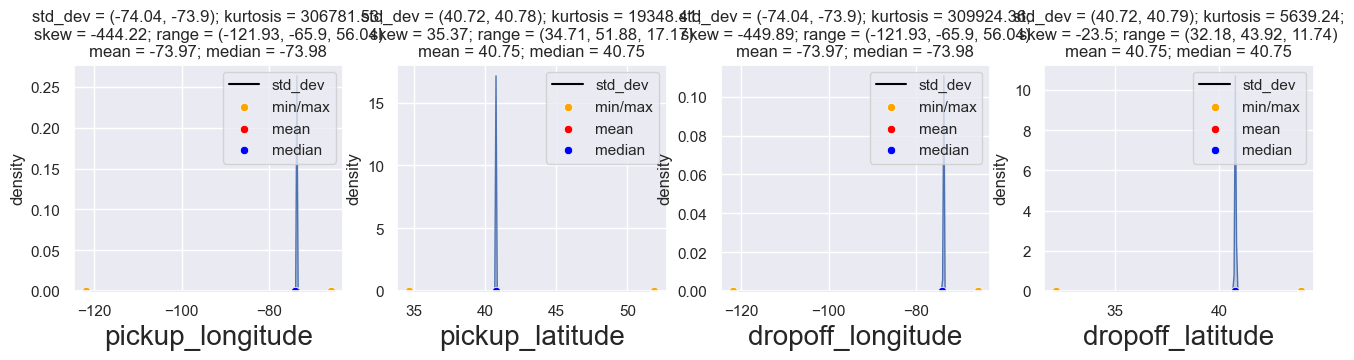

In [32]:
#Geospatial data
UVA_numeric(data,geospatial_data)

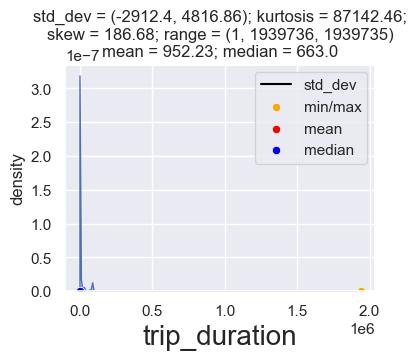

In [33]:
#Trip Duration
UVA_numeric(data,trip_duration)

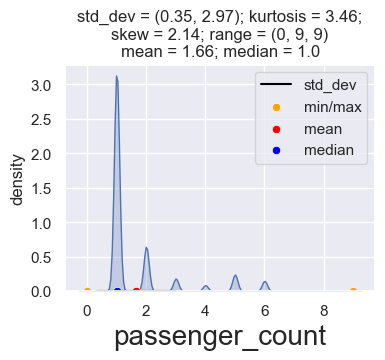

In [34]:
# Passenger Count
UVA_numeric(data,passenger_count)

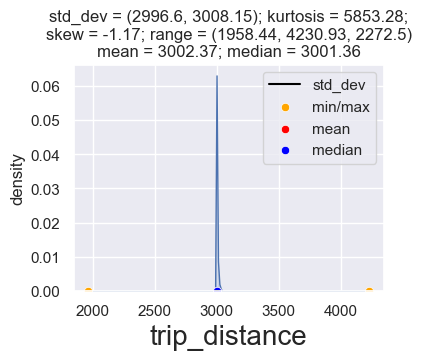

In [35]:
#Geospatial data
distance=['trip_distance']
UVA_numeric(data,distance)

<p> This shows all these features have outlier. Let confirm this hypothesis by plotting a Q_Q graph to check normality</p>

In [36]:
# Normality Check function
def normality_check(data,var_group):
    size = len(var_group)
    #plt.figure(figsize = (5*size,3), dpi = 100)
    # qqplot
    for j,i in enumerate(var_group):
        skew=pd.DataFrame.skew(data[i])
        print("Q_Q plot for ", i)
        sm.qqplot(data[i],line='s')
        py.show()     

In [37]:
#normality_check(data,geospatial_data)

<h4>Summary</h4>
<ul>
    <li> Geospatial data is mostly normally distributed expcept for a few outliers.</li>
</ul>

Q_Q plot for  trip_duration


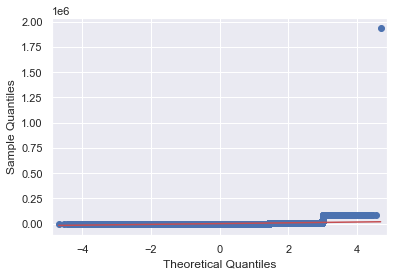

In [38]:
# Normality check for time data
normality_check(data,trip_duration)

<h4>Summary</h4>
<ul>
    <li> Trip duration data is mostly normally distributed expcept for a outliers.</li>
</ul>

In [39]:
# Normality check for passenger count
#normality_check(data,passenger_count)

<h4>Summary</h4>
<ul>
    <li> Passenger count data is not normally distributed.</li>
</ul>

<h4>Univariate Outlier</h4> 

In [40]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boxplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (5*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

<h4> Geospatial Data </h4>

True
True
True
True


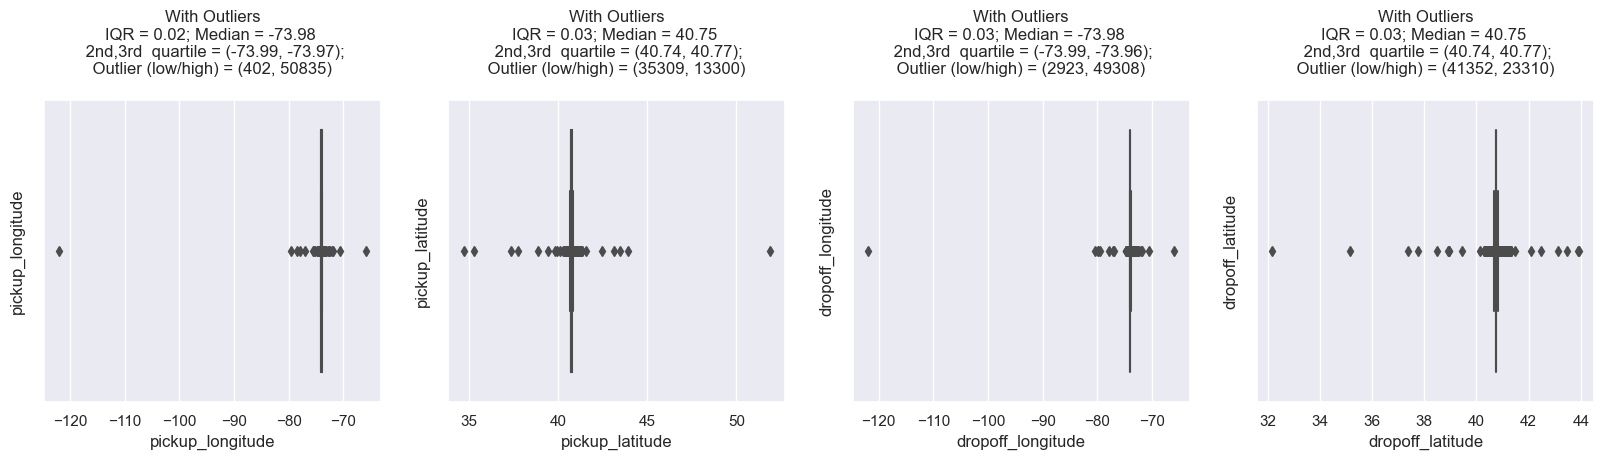

In [41]:
UVA_outlier(data,geospatial_data)

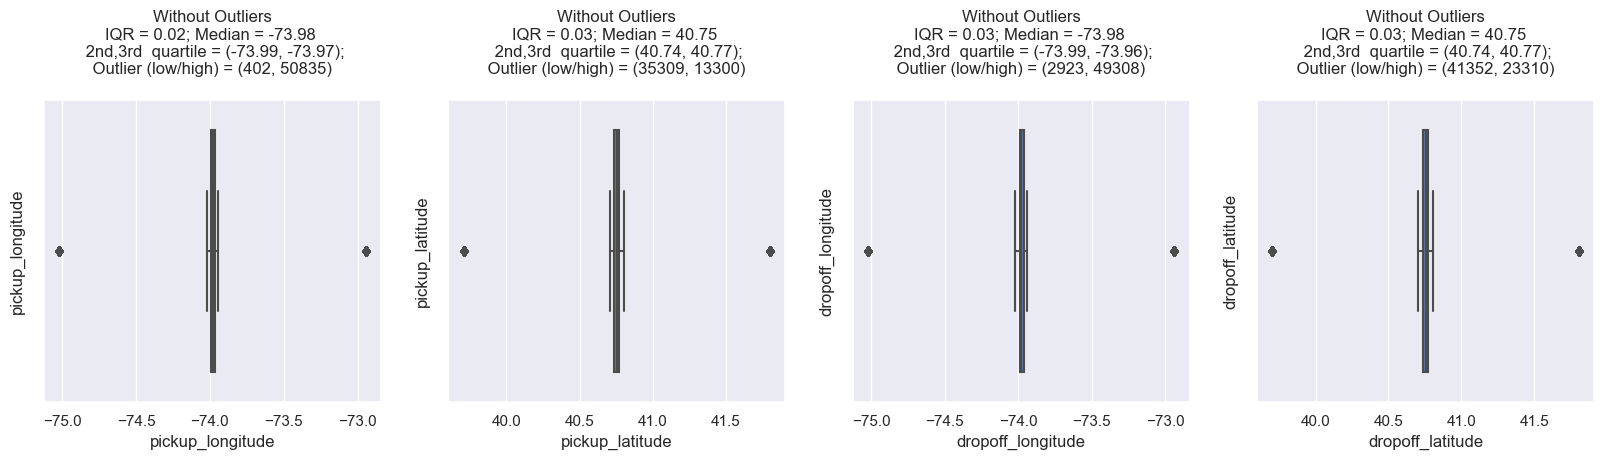

In [42]:
UVA_outlier(data,geospatial_data,include_outlier=False)

<h4> Trip Duration </h4>

True


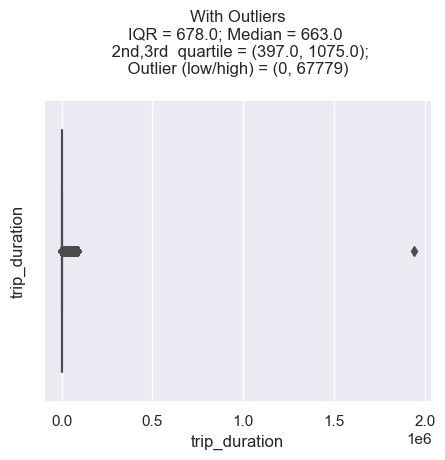

In [43]:
UVA_outlier(data,trip_duration)

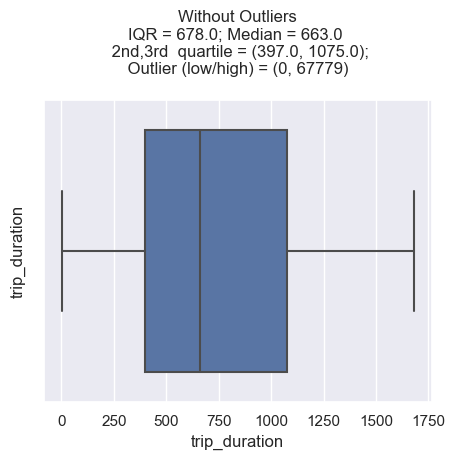

In [44]:
UVA_outlier(data,trip_duration,include_outlier=False)

<h4>Passenger Count </h4>

True


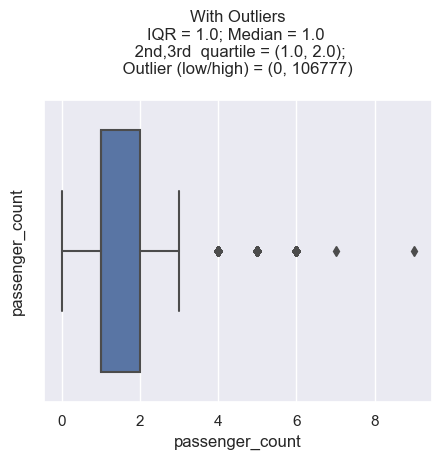

In [45]:
UVA_outlier(data,passenger_count)

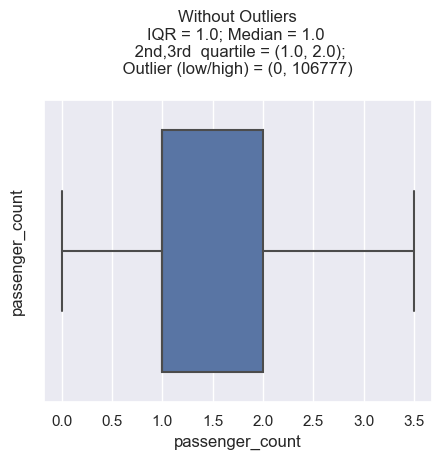

In [46]:
UVA_outlier(data,passenger_count,include_outlier=False)

<h4>Trip Distance</h4>

True


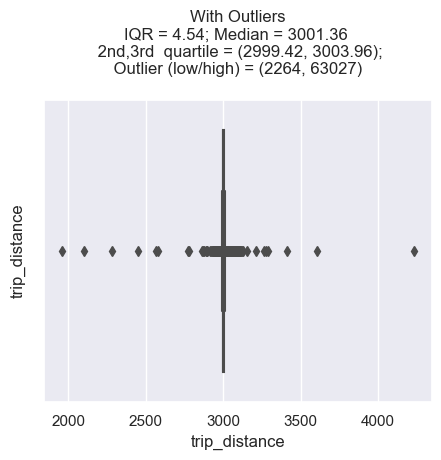

In [59]:
distance=['trip_distance']
UVA_outlier(data,distance)

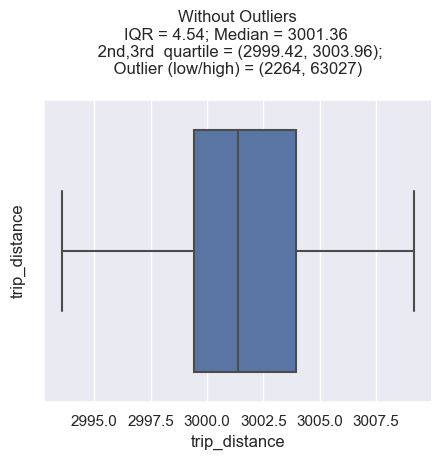

In [60]:
UVA_outlier(data,distance,include_outlier=False)

<h3>Univariate Analysis : Categorical Varibales</h3>

In [47]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
store_and_fwd_flag          category
dtype: object

In [48]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()
  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

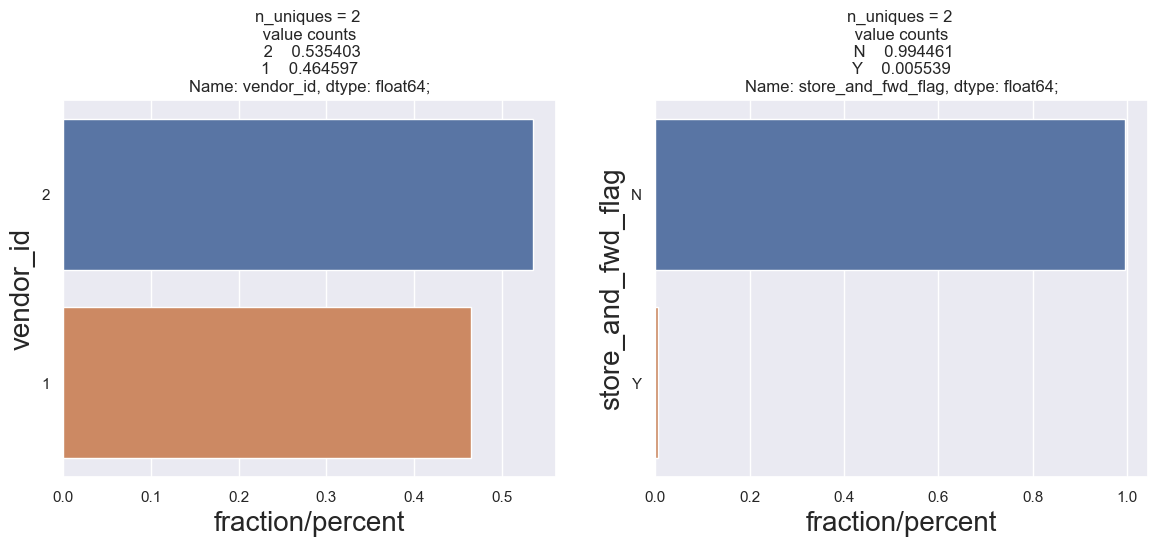

In [49]:
UVA_category(data,['vendor_id','store_and_fwd_flag'])

<ul><h3>Observations:</h3>
<li>Vendor 2 has more number of trips as compared to vendor 1.</li>
<li>The store_and_fwd_flag values, indicating whether the trip data was sent immediately to the vendor (“0”) or held in the memory of the taxi because there was no connection to the server (“1”), show that there was almost no storing taking place.</li>
</ul>

Text(0, 0.5, 'Frequency')

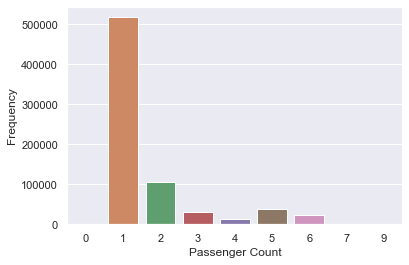

In [50]:
sns.countplot(data['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
#UVA_category(data,['passenger_count'])

<ul><h3>Observations:</h3>

<li>Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number. Following list shows the ratio ditribution of passenger count</li>  
 <ol>
 <li>1 passenger-->  0.709447
 <li>2 passengers-->  0.144102
 <li>5 passengers-->  0.053373
 <li>3 passengers-->  0.040712
 <li>6 passengers-->  0.033054
 <li>4 passengers-->  0.019264
 <li>0 passengers-->  0.000045
 <li>9 passengers-->  0.000001
 <li>7 passengers-->  0.000001
 </ol>    
 </ul>

Text(0, 0.5, 'Total Number of pickups')

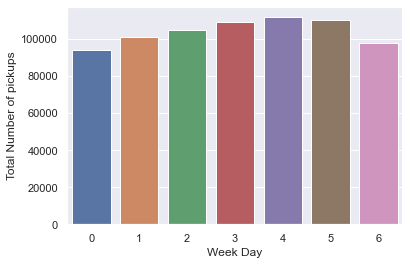

In [56]:
sns.countplot(data['dow_pickup'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')


Text(0, 0.5, 'Frequency')

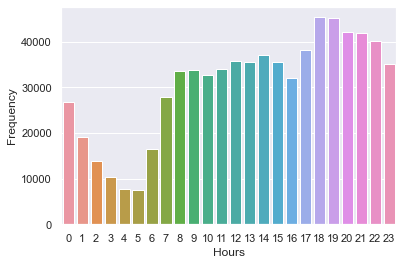

In [53]:
sns.countplot(data['hour'])
plt.xlabel('Hours')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

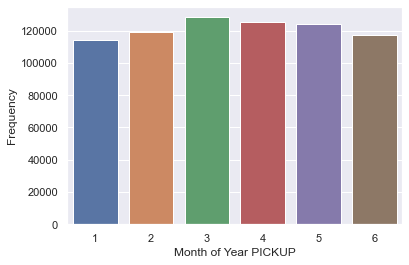

In [54]:
sns.countplot(data['moy_pickup'])
plt.xlabel('Month of Year PICKUP')
plt.ylabel('Frequency')

<ul><h3>Summary</h3>
    <li>We know that in datetime module 0 is Sunday. Therefore the 4th day is Thursday, which is the busiest day according to this data.</li>
    <li>On Weekends (Saturday 6 and Sunday 0) the trips are lowest.</li>
    <li>6-7 p.m. is the busiest time whereas 4-5 a.m. has the least number of trips.</li>
    <li>March (3) is the busiest month.</li>
</ul>

<h2>Bivariate Analysis : Numerical-Numerical</h2>

In [61]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
trip_duration            int64
doy_pickup               int64
woy_pickup               int64
moy_pickup               int64
dow_pickup               int64
doy_dropoff              int64
woy_dropoff              int64
moy_dropoff              int64
dow_dropoff              int64
hour                     int64
trip_distance          float64
check_trip_duration    float64
dtype: object

<h3>Correlation Matrix</h3>

In [62]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_pickup,woy_pickup,moy_pickup,dow_pickup,doy_dropoff,woy_dropoff,moy_dropoff,dow_dropoff,hour,trip_distance,check_trip_duration
passenger_count,1.000000,0.002369,-0.004693,0.000367,-0.003935,0.013022,-0.001182,0.005154,-0.001480,0.025758,-0.001168,0.005115,-0.001496,0.025941,0.009851,0.001346,0.013022
pickup_longitude,0.002369,1.000000,-0.079277,0.373761,0.051758,0.059576,0.005224,0.010006,0.005370,-0.026254,0.005270,0.009888,0.005460,-0.027633,0.017979,0.856145,0.059576
pickup_latitude,-0.004693,-0.079277,1.000000,0.043331,0.472616,-0.038444,-0.001346,-0.004914,-0.000291,-0.029208,-0.001415,-0.004915,-0.000360,-0.029390,0.011499,0.070465,-0.038444
dropoff_longitude,0.000367,0.373761,0.043331,1.000000,0.104654,0.034805,0.005287,0.008291,0.005130,-0.001715,0.005330,0.008312,0.005197,-0.001590,-0.037432,0.789724,0.034805
dropoff_latitude,-0.003935,0.051758,0.472616,0.104654,1.000000,-0.028468,-0.001724,-0.002505,-0.000700,-0.022098,-0.001770,-0.002509,-0.000741,-0.022469,0.014330,0.138858,-0.028468
trip_duration,0.013022,0.059576,-0.038444,0.034805,-0.028468,1.000000,0.009418,0.007907,0.009377,-0.002302,0.010285,0.007071,0.010135,-0.003369,0.002979,0.054643,1.000000
doy_pickup,-0.001182,0.005224,-0.001346,0.005287,-0.001724,0.009418,1.000000,0.713257,0.985661,-0.012496,0.999998,0.713902,0.985660,-0.012224,-0.003549,0.006230,0.009418
woy_pickup,0.005154,0.010006,-0.004914,0.008291,-0.002505,0.007907,0.713257,1.000000,0.721769,0.039291,0.713255,0.999310,0.721761,0.039096,-0.016984,0.010680,0.007907
moy_pickup,-0.001480,0.005370,-0.000291,0.005130,-0.000700,0.009377,0.985661,0.721769,1.000000,-0.013625,0.985659,0.722364,0.999937,-0.013320,-0.003301,0.006342,0.009377
dow_pickup,0.025758,-0.026254,-0.029208,-0.001715,-0.022098,-0.002302,-0.012496,0.039291,-0.013625,1.000000,-0.012473,0.039141,-0.013604,0.993789,-0.082079,-0.021350,-0.002302


<h3>HeatMaps</h3>

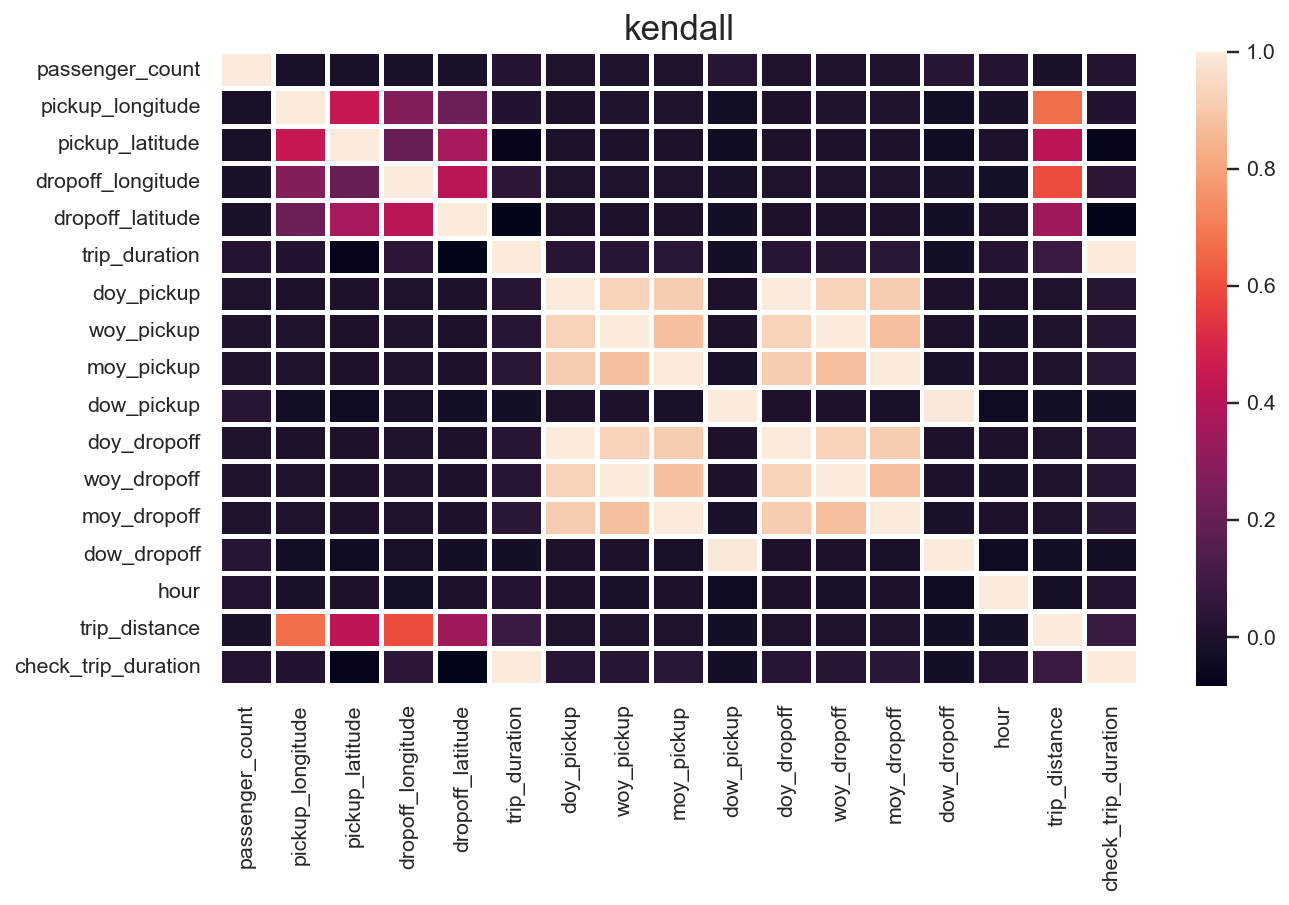

In [65]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['kendall']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

<h3>Summary</h3>
<ul>
    <li>Geospatial Data (latitude and longitude) has high correlation with trip distance feature.</li>
    <li>However trip duration does not seems to have a strong correlation with neither geospatial data nor the distance covered.</li>
    <li>Date information have high correlation with all its part data (day of week, month of year etc.)</li>
</ul>

<h2>Bivariate : Categorical-Categorical</h2>

In [66]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

<h3> Which vendor is preferred during the hours of the day? </h3> 

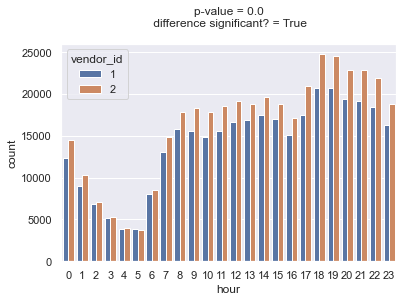

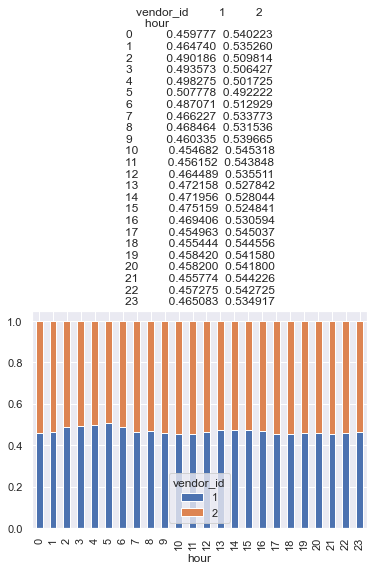

In [68]:
BVA_categorical_plot(data, 'vendor_id', 'hour')

<h3>Observation</h3>
<ul>
<li> We see that vendor 2 is preferred over vendor 1 throughout the day.
</ul>